In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Imports the cvs data and displays some info
date = "202205" # YYYYMM identifies the cvs file
path = "cleaned_" + date + ".csv"
data = pd.read_csv(path)
#data.head()
#data.info()

# extract year and month
year = date[0:4]
month_number = int(date[4:6])
month = calendar.month_name[month_number]
date_header = ", " + year + " " + month

# Turns the entries of the columns "started_at" and "ended_at" 
# into datetime format and the "ride_length" column into timedelta format
data["started_at"] = pd.to_datetime(data["started_at"])
data["ended_at"] = pd.to_datetime(data["ended_at"])
data["ride_length"] = pd.to_timedelta(data["ride_length"])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502516 entries, 0 to 502515
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   Unnamed: 0          502516 non-null  int64          
 1   ride_id             502516 non-null  object         
 2   rideable_type       502516 non-null  object         
 3   started_at          502516 non-null  datetime64[ns] 
 4   ended_at            502516 non-null  datetime64[ns] 
 5   start_station_name  502516 non-null  object         
 6   start_station_id    502516 non-null  object         
 7   end_station_name    502516 non-null  object         
 8   end_station_id      502516 non-null  object         
 9   start_lat           502516 non-null  float64        
 10  start_lng           502516 non-null  float64        
 11  end_lat             502516 non-null  float64        
 12  end_lng             502516 non-null  float64        
 13  member_casual 

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,0 days 00:33:21,0
1,1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,0 days 00:37:54,2
2,2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,0 days 00:21:50,3
3,3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,0 days 00:08:42,1
4,4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,0 days 00:05:01,1


MAX ride duration, 2022 May
member_casual          casual          member             All
day_of_week                                                  
0             7 days 10:42:58 0 days 23:13:47 7 days 10:42:58
1             1 days 00:59:25 1 days 00:03:45 1 days 00:59:25
2             0 days 22:44:05 0 days 21:19:43 0 days 22:44:05
3             1 days 00:55:49 1 days 00:35:38 1 days 00:55:49
4             1 days 00:33:36 1 days 00:15:18 1 days 00:33:36
5             1 days 00:20:00 0 days 20:50:27 1 days 00:20:00
6             1 days 00:32:14 0 days 14:13:35 1 days 00:32:14
All           7 days 10:42:58 1 days 00:35:38 7 days 10:42:58


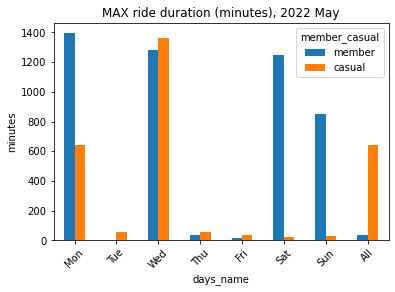

In [45]:
print("MAX ride duration" + date_header)
pivot_max = pd.pivot_table(data
               , index = "day_of_week"
               , columns = "member_casual"
              , values = "ride_length"
              , aggfunc = max
              , margins = True)
print(pivot_max)

for i in pivot_max.keys():
    pivot_max[i] = pivot_max[i].dt.days/24/60 + pivot_max[i].dt.seconds/60

pivot_max["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun","All"]
pivot_max.plot(kind="bar", x = "days_name", y = ["member","casual"]
              , title="MAX ride duration (minutes)" + date_header
               , rot=45)

plt.ylabel("minutes")
plt.show()

MIN ride duration, 2022 May
member_casual          casual          member             All
day_of_week                                                  
0             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
1             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
2             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
3             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
4             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
5             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
6             0 days 00:00:01 0 days 00:00:01 0 days 00:00:01
All           0 days 00:00:01 0 days 00:00:01 0 days 00:00:01


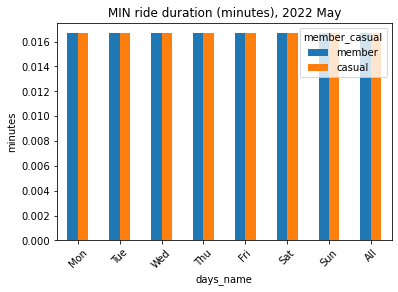

In [46]:
print("MIN ride duration" + date_header)
pivot_min = pd.pivot_table(data
               , index = "day_of_week"
               , columns = "member_casual"
              , values = "ride_length"
              , aggfunc = min
              , margins = True)
print(pivot_min)

for i in pivot_min.keys():
    pivot_min[i] = pivot_min[i].dt.seconds/60

pivot_min["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun","All"]
pivot_min.plot(kind="bar", x = "days_name", y = ["member","casual"]
              , title="MIN ride duration (minutes)" + date_header
               , rot=45)
plt.ylabel("minutes")
plt.show()

Count of rides, 2022 May
member_casual  casual  member     All
day_of_week                          
0               37532   49745   87277
1               26894   48069   74963
2               17756   35893   53649
3               25468   41147   66615
4               24660   33414   58074
5               43004   35694   78698
6               44918   38322   83240
All            220232  282284  502516


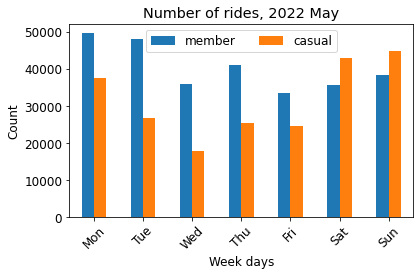

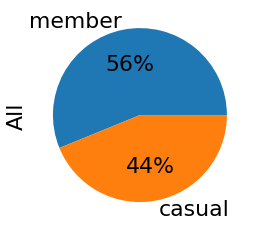

In [154]:
print("Count of rides" + date_header)
pivot_count = pd.pivot_table(data
               , index = "day_of_week"
               , columns = "member_casual"
              , values = "ride_length"
              , aggfunc = len
              , margins = True)
print(pivot_count)

pivot_count["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun","All"]

plt.rcParams.update({'font.size': 12})
pivot_count.iloc[:-1,[0,1,3]].plot(kind="bar"
            , x = "days_name", y = ["member","casual"]
            , title="Number of rides" + date_header
                 , rot=45)
plt.ylabel("Count")
plt.xlabel("Week days")
plt.legend(loc="upper center", ncol=3).set_title('')

plt.tight_layout()
plt.savefig("Number of rides" + date_header + ".png"
            , dpi=300)
plt.show()

plt.rcParams.update({'font.size': 22})
pivot_count.iloc[-1,[0,1]].reindex(["member","casual"]).plot(kind="pie"
                                                             , autopct='%1.0f%%')
plt.savefig("Number of rides Pie" + date_header + ".png"
            , dpi=300)
plt.show()
plt.rcParams.update({'font.size': 12})

Mean ride duration, 2022 May
member_casual          casual          member             All
day_of_week                                                  
0             0 days 00:29:55 0 days 00:13:19 0 days 00:20:27
1             0 days 00:25:01 0 days 00:12:36 0 days 00:17:03
2             0 days 00:23:20 0 days 00:12:17 0 days 00:15:56
3             0 days 00:25:13 0 days 00:13:02 0 days 00:17:41
4             0 days 00:24:38 0 days 00:12:38 0 days 00:17:43
5             0 days 00:29:35 0 days 00:14:51 0 days 00:22:54
6             0 days 00:30:31 0 days 00:14:34 0 days 00:23:10
All           0 days 00:27:42 0 days 00:13:18 0 days 00:19:37


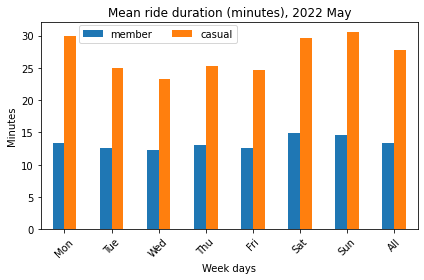

In [108]:
print("Mean ride duration" + date_header)
pivot_mean = pd.pivot_table(data
               , index = "day_of_week"
               , columns = "member_casual"
              , values = "ride_length"
              , aggfunc = lambda x: x.mean().round('1s')
              , margins = True)
print(pivot_mean)

for i in pivot_mean.keys():
    pivot_mean[i] = pivot_mean[i].dt.seconds/60

pivot_mean["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun","All"]

pivot_mean.iloc[:,[0,1,3]].plot(kind="bar", x = "days_name"
                , y = ["member","casual"]
                , title="Mean ride duration (minutes)" + date_header
                , rot=45)
plt.ylabel("Minutes")
plt.xlabel("Week days")
plt.legend(loc=[0.1,0.9], ncol = 3).set_title("")

plt.tight_layout()
plt.savefig("Mean ride duration (minutes)" + date_header + ".png",dpi=300)
plt.show()

Mode ride duration, 2022 May
member_casual          casual          member             All
day_of_week                                                  
0             0 days 00:09:44 0 days 00:05:31 0 days 00:09:44
1             0 days 00:07:47 0 days 00:03:48 0 days 00:06:36
2             0 days 00:06:34 0 days 00:04:58 0 days 00:07:04
3             0 days 00:08:37 0 days 00:04:23 0 days 00:08:37
4             0 days 00:09:03 0 days 00:05:02 0 days 00:05:28
5             0 days 00:09:47 0 days 00:05:02 0 days 00:07:57
6             0 days 00:10:40 0 days 00:00:02 0 days 00:00:02
All           0 days 00:09:35 0 days 00:05:02 0 days 00:06:45


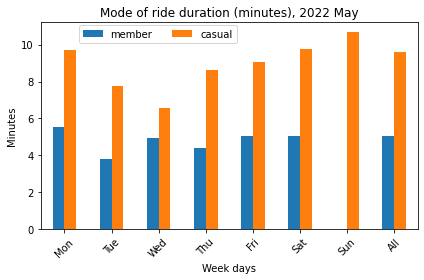

In [109]:
print("Mode ride duration" + date_header)
pivot_mode = pd.pivot_table(data
               , index = "day_of_week"
               , columns = "member_casual"
              , values = "ride_length"
              , aggfunc = lambda x: x.mode()[0]
              , margins = True)
print(pivot_mode)

for i in pivot_mode.keys():
    pivot_mode[i] = pivot_mode[i].dt.seconds/60

pivot_mode["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun","All"]
pivot_mode.iloc[:,[0,1,3]].plot(kind="bar", x = "days_name"
                , y = ["member","casual"]
                , title="Mode of ride duration (minutes)" + date_header
                , rot=45)
plt.ylabel("Minutes")
plt.xlabel("Week days")
plt.legend(loc=[0.1,0.9], ncol=2).set_title("")

plt.tight_layout()
plt.savefig("Mode of ride duration (minutes)" + date_header + ".png", dpi=300)
plt.show()

In [124]:
print("Summary Table for member_vs_casual, ride duration" + date_header)
summary = pd.pivot_table(data
               , index = "member_casual"
              , values = "ride_length"
              , aggfunc = [max, min, len, lambda x: x.mode()[0]]
              , margins = True)
pivot_mean = pd.pivot_table(data
               , index = "member_casual"
              , values = "ride_length"
              , aggfunc = lambda x: x.mean().round(freq='s')
              , margins = True)

summary["mean"]= pivot_mean['ride_length']
summary
#pivot_mean.keys()
summary_vs = summary.rename( 
    columns={'<lambda>': 'mode', "len" : 'count'}
    )
summary_vs 

Summary Table for member_vs_casual, ride duration, 2022 May


,max,min,count,mode,mean
,ride_length,ride_length,ride_length,ride_length,
member_casual,,,,,
casual,7 days 10:42:58,0 days 00:00:01,220232,0 days 00:09:35,0 days 00:27:42
member,1 days 00:35:38,0 days 00:00:01,282284,0 days 00:05:02,0 days 00:13:18
All,7 days 10:42:58,0 days 00:00:01,502516,0 days 00:06:45,0 days 00:19:37


In [63]:
print("Summary Table for days of the week, ride duration" + date_header)
summary = pd.pivot_table(data
               , index = "day_of_week"
              , values = "ride_length"
              , aggfunc = [max, min, len, lambda x: x.mode()[0]]
              , margins = True)
pivot_mean = pd.pivot_table(data
               , index = "day_of_week"
              , values = "ride_length"
              , aggfunc = lambda x: x.mean().round(freq='s')
              , margins = True)

summary["mean"]= pivot_mean['ride_length']
summary
#pivot_mean.keys()
summary_week = summary.rename( 
    columns={'<lambda>': 'mode', "len" : 'count'}
    )
summary_week

Summary Table for days of the week,  ride duration, 2022 April


,max,min,count,mode,mean
,ride_length,ride_length,ride_length,ride_length,
day_of_week,,,,,
0,1 days 00:52:55,0 days 00:00:01,33726,0 days 00:03:59,0 days 00:13:53
1,1 days 00:40:23,0 days 00:00:01,40861,0 days 00:04:18,0 days 00:13:39
2,2 days 19:25:54,0 days 00:00:01,30739,0 days 00:04:43,0 days 00:12:43
3,1 days 00:58:11,0 days 00:00:01,40453,0 days 00:06:07,0 days 00:15:09
4,1 days 00:39:53,0 days 00:00:01,37497,0 days 00:05:07,0 days 00:14:33
5,5 days 05:45:58,0 days 00:00:01,56263,0 days 00:05:23,0 days 00:22:28
6,0 days 23:58:35,0 days 00:00:01,33007,0 days 00:06:22,0 days 00:19:27
All,5 days 05:45:58,0 days 00:00:01,272546,0 days 00:04:18,0 days 00:16:27


SUM ride duration, 2022 May
member_casual  casual  member   All days_name
day_of_week                                  
0                 779     459  1239       Mon
1                 467     420   887       Tue
2                 287     305   593       Wed
3                 445     372   818       Thu
4                 421     292   714       Fri
5                 883     367  1251       Sat
6                 951     387  1339       Sun


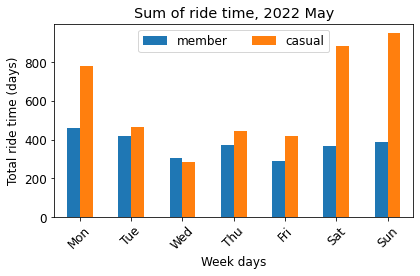

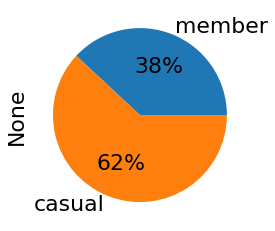

In [135]:
print("SUM ride duration" + date_header)
summary_sum = pd.pivot_table(data
               , index = "day_of_week"
               , columns = "member_casual"
              , values = "ride_length"
              , aggfunc = sum
              , margins = False)
summary_sum["All"] = summary_sum["casual"] + summary_sum["member"]
# print(summary_sum)

summary_sum["days_name"] = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
summary_sum["casual"] = summary_sum["casual"].dt.days
summary_sum["member"] = summary_sum["member"].dt.days
summary_sum["All"] = summary_sum["All"].dt.days
print(summary_sum)

myplot = summary_sum.iloc[:,[0,1,3]].plot(kind = "bar"
                          , x = "days_name"
                          , y = ["member","casual"]
                          , title = "Sum of ride time" + date_header
                          , rot=45)
myplot.set(xlabel="Week days", ylabel="Total ride time (days)")
plt.legend(loc="upper center", ncol=2).set_title("")
plt.tight_layout()
plt.savefig("Sum of ride time" + date_header + ".png", dpi=300)
plt.show()

plt.rcParams.update({'font.size': 22})
summary_sum.iloc[:,[0,1]].sum().reindex(["member","casual"]).plot(kind="pie", autopct='%1.0f%%')
plt.savefig("Sum of ride time Pie" + date_header + ".png"
            , dpi=300)
plt.show()
plt.rcParams.update({'font.size': 12})

In [67]:
data_cut = data[["member_casual","ride_length","day_of_week"]]
data_casual = data_cut.groupby("member_casual").get_group("casual")
data_member = data_cut.groupby("member_casual").get_group("member")
data_casual.loc[:,"ride_length"] = (data_casual["ride_length"].dt.seconds/60
                        + data_casual["ride_length"].dt.days/24/60) #minutes
data_member.loc[:,"ride_length"] = (data_member["ride_length"].dt.seconds/60
                                        + data_member["ride_length"].dt.days/24/60)#minutes
    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


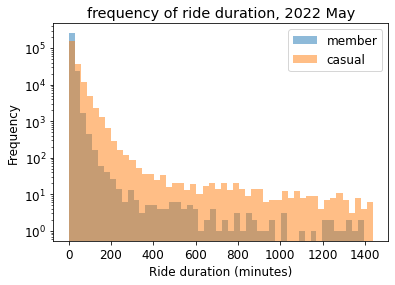

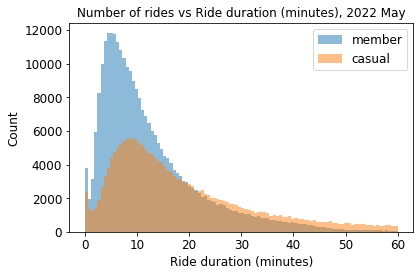

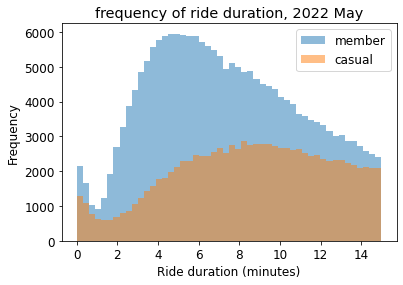

In [141]:
#data_casual.plot(kind="hist")

data_member.ride_length.plot(
    kind="hist", bins = 50, log=True, alpha=0.5, label="member",
    title="frequency of ride duration" + date_header)
data_casual.ride_length.plot(
    kind="hist", bins = 50, log=True, alpha=0.5, label="casual")
plt.legend(loc="upper right")
plt.xlabel("Ride duration (minutes)")
plt.show()

data_member.ride_length[data_member.ride_length < 60].plot(
    kind="hist", bins = 100, log=False, alpha=0.5, label="member",
    title="frequency of ride duration" + date_header)
data_casual.ride_length[data_casual.ride_length < 60].plot(
    kind="hist", bins = 100, log=False, alpha=0.5, label="casual")
plt.legend(loc="upper right")
plt.xlabel("Ride duration (minutes)")
plt.ylabel("Count")
plt.title("Number of rides vs Ride duration (minutes)" + date_header, 
         fontsize = 12)
plt.tight_layout()
plt.savefig("Frequency of ride duration" + date_header + ".png", dpi=300)
plt.show()

data_member.ride_length[data_member.ride_length < 15].plot(
    kind="hist", bins = 50, log=False, alpha=0.5, label="member",
    title="frequency of ride duration" + date_header)
data_casual.ride_length[data_casual.ride_length < 15].plot(
    kind="hist", bins = 50, log=False, alpha=0.5, label="casual")
plt.legend(loc="upper right")
plt.xlabel("Ride duration (minutes)")
plt.show()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502516 entries, 0 to 502515
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   Unnamed: 0          502516 non-null  int64          
 1   ride_id             502516 non-null  object         
 2   rideable_type       502516 non-null  object         
 3   started_at          502516 non-null  datetime64[ns] 
 4   ended_at            502516 non-null  datetime64[ns] 
 5   start_station_name  502516 non-null  object         
 6   start_station_id    502516 non-null  object         
 7   end_station_name    502516 non-null  object         
 8   end_station_id      502516 non-null  object         
 9   start_lat           502516 non-null  float64        
 10  start_lng           502516 non-null  float64        
 11  end_lat             502516 non-null  float64        
 12  end_lng             502516 non-null  float64        
 13  member_casual 

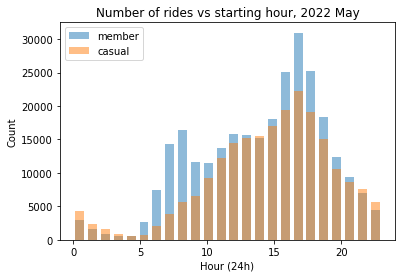

In [104]:
hour_member = data.started_at[data.member_casual == "member"].dt.hour
hour_casual = data.started_at[data.member_casual == "casual"].dt.hour

hour_member.plot(kind="hist", bins = 24, log=False
                 , alpha=0.5, label="member", rwidth=0.7)
hour_casual.plot(kind="hist", bins = 24, log=False
                 , alpha=0.5, label="casual", rwidth=0.7)
plt.xlabel("Hour (24h)")
plt.ylabel("Count")
plt.legend(loc="upper left")
plt.title("Number of rides vs starting hour" + date_header)
plt.savefig("Starting hour" + date_header + ".png", dpi=300)
plt.show()

In [81]:
data["starting_hour"] = data["started_at"].dt.hour

day_hour_member = pd.pivot_table(data[data.member_casual == "member"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_id"
                          , aggfunc = len)
day_hour_casual = pd.pivot_table(data[data.member_casual == "casual"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_id"
                          , aggfunc = len)

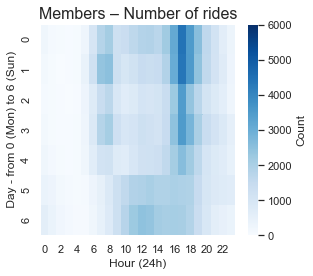

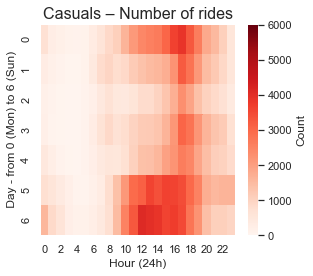

In [177]:
import seaborn 
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

image_size = 4
seaborn.set(rc={'figure.figsize':(image_size*1.125,image_size)})
seaborn.heatmap(day_hour_member, cmap="Blues"#, norm=LogNorm()
           ,cbar_kws={'label': 'Count'}
            , vmin=0, vmax=6000)
#ax.set_yticks(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Members – Number of rides", fontsize=16)
plt.tight_layout()
plt.savefig("heatmap_Members_" + date_header + ".png",dpi=300)
plt.show()

seaborn.heatmap(day_hour_casual, cmap="Reds"#, norm=LogNorm()
           ,cbar_kws={'label': 'Count'}
            , vmin=0, vmax=6000)

plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Casuals – Number of rides", fontsize=16)
plt.tight_layout()
plt.savefig("heatmap_Casuals_" + date_header + ".png",dpi=300)
plt.show()

In [97]:
day_hour_member_mean = pd.pivot_table(data[data.member_casual == "member"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_length"
                          , aggfunc = lambda x : x.mean().seconds/60)
day_hour_casual_mean = pd.pivot_table(data[data.member_casual == "casual"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_length"
                          , aggfunc = lambda x : x.mean().seconds/60)

day_hour_casual_mean

starting_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,23.050000,28.266667,26.083333,26.183333,16.916667,24.766667,20.266667,19.016667,23.600000,30.500000,...,32.666667,31.300000,28.700000,27.550000,26.366667,29.233333,25.883333,26.083333,27.883333,30.200000
1,28.316667,34.800000,31.216667,28.616667,22.400000,17.850000,18.983333,13.650000,17.850000,23.616667,...,27.683333,25.500000,24.383333,23.083333,23.983333,23.300000,21.983333,25.716667,21.316667,29.400000
2,30.850000,36.783333,35.750000,18.433333,25.300000,12.983333,13.283333,16.233333,15.833333,18.250000,...,25.300000,23.833333,21.216667,23.066667,23.500000,24.783333,26.200000,20.000000,19.300000,24.700000
3,22.933333,17.416667,22.000000,38.300000,16.466667,13.466667,17.050000,13.400000,17.450000,27.700000,...,28.400000,26.200000,25.733333,24.166667,26.766667,27.933333,28.000000,23.350000,21.416667,26.166667
4,29.833333,20.416667,40.683333,58.550000,28.250000,16.550000,19.550000,15.616667,17.433333,24.600000,...,28.200000,25.833333,23.866667,23.383333,21.750000,22.733333,21.900000,22.983333,29.733333,23.433333
5,31.216667,23.983333,26.950000,22.700000,25.483333,21.133333,24.133333,23.333333,26.683333,28.233333,...,33.133333,33.600000,30.700000,28.050000,26.650000,25.383333,28.466667,25.550000,24.616667,26.583333
6,26.233333,26.983333,26.783333,34.166667,32.533333,27.650000,26.750000,40.866667,29.333333,30.933333,...,32.500000,32.600000,30.316667,28.383333,28.533333,30.650000,29.766667,25.566667,24.166667,26.016667


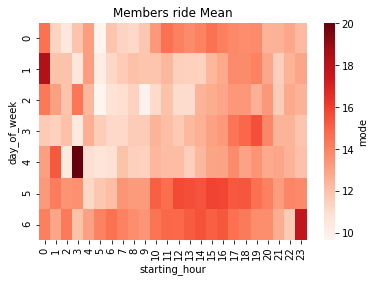

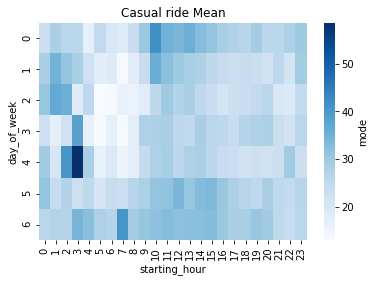

In [99]:
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

sns.heatmap(day_hour_member_mean, cmap="Reds"
           ,cbar_kws={'label': 'mean'})
plt.title("Members ride Mean")
plt.show()
sns.heatmap(day_hour_casual_mean, cmap="Blues"
           ,cbar_kws={'label': 'mean'})
plt.title("Casual ride Mean")
plt.show()

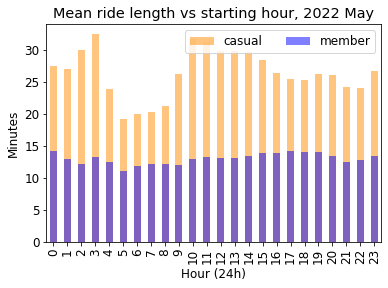

In [143]:

day_hour_casual_mean.mean().plot(kind = "bar"
                                 , alpha=0.5, label="casual"
                                , color="darkorange")
day_hour_member_mean.mean().plot(kind = "bar"
                                , alpha=0.5, label="member"
                                , color="blue")

plt.xlabel("Hour (24h)")
plt.ylabel("Minutes")
plt.legend(ncol=2, loc="upper right")
plt.title("Mean ride length vs starting hour"+date_header)
plt.savefig("Mean vs starting hour"+date_header+".png",dpi=300)
plt.show()

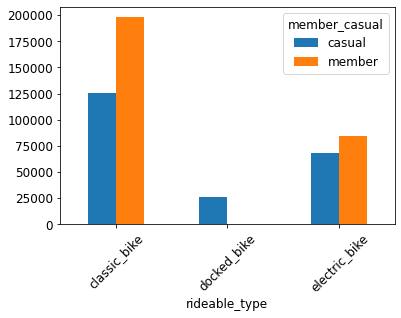

starting_hour   0    1    2    3    4    5     6     7     8     9   ...  \
day_of_week                                                          ...   
0              367  196  101   59  100  486  1499  2753  3078  1865  ...   
1              254   88   45   43  106  649  1762  3439  3596  1853  ...   
2              186   82   45   40   67  471  1121  2212  2653  1358  ...   
3              251   86   43   37   87  413  1324  2760  3147  1815  ...   
4              358  202   79   65   84  379   991  1698  1705  1142  ...   
5              589  431  213  148   81  162   440   762  1167  1795  ...   
6              886  576  355  168  115  156   380   694  1079  1812  ...   

starting_hour    14    15    16    17    18    19    20    21    22    23  
day_of_week                                                                
0              2418  3139  4548  6118  4811  3486  2272  1670   963   508  
1              2113  2863  4548  6051  4786  3322  2209  1623  1079   498  
2          

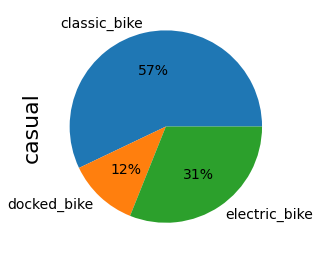

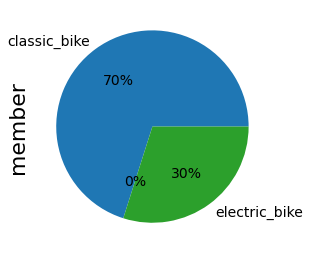

In [147]:
day_hour_type = pd.pivot_table(data
                           , index = "rideable_type"
                           , columns = "member_casual"
                           , values = "ride_id"
                           , aggfunc = len
                            ).fillna(0)
day_hour_type.plot(kind="bar", rot=45)
plt.show()
print(day_hour_member)


#Pie chart 
plt.rcParams.update({'font.size': 22})
day_hour_type.casual.plot(kind="pie"
                          , autopct='%1.0f%%'
                          , textprops={'fontsize': 14})
plt.tight_layout()
plt.savefig("RideableType_casual"+date_header, dpi=300)
plt.show()

day_hour_type.member.plot(kind="pie"
                          , autopct='%1.0f%%'
                         , textprops={'fontsize': 14})
plt.tight_layout()
plt.savefig("RideableType_member"+date_header, dpi=300)
plt.show()
plt.rcParams.update({'font.size': 12})

In [181]:
subset = data.loc[:,["member_casual"
            ,"rideable_type"]][
    data.rideable_type=="docked_bike"]
subset[data.member_casual == "casual"]

<ipython-input-181-b61ada29d464>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset[data.member_casual == "casual"]


,member_casual,rideable_type
7,casual,docked_bike
28,casual,docked_bike
74,casual,docked_bike
100,casual,docked_bike
110,casual,docked_bike
...,...,...
502458,casual,docked_bike
502474,casual,docked_bike
502486,casual,docked_bike
502498,casual,docked_bike


In [194]:
# data["starting_hour"] = data["started_at"].dt.hour

day_hour_member_classic = pd.pivot_table(
    data[data.member_casual == "member"]
    [data.rideable_type == "classic_bike"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_id"
                          , aggfunc = len)
day_hour_member_electric = pd.pivot_table(
    data[data.member_casual == "member"]
    [data.rideable_type == "electric_bike"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_id"
                          , aggfunc = len)
day_hour_casual_electric = pd.pivot_table(
    data[data.member_casual == "casual"]
    [data.rideable_type == "electric_bike"]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_id"
                          , aggfunc = len)
day_hour_casual_classic = pd.pivot_table(
    data[data.member_casual == "casual"]
    [data.rideable_type == ("electric_bike" or "docked_bike")]
                           , index = "day_of_week"
                           , columns = "starting_hour"
                          , values = "ride_id"
                          , aggfunc = len)

<ipython-input-194-07a9ffbdbbc6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.member_casual == "member"]
<ipython-input-194-07a9ffbdbbc6>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.member_casual == "member"]
<ipython-input-194-07a9ffbdbbc6>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.member_casual == "casual"]
<ipython-input-194-07a9ffbdbbc6>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.member_casual == "casual"]


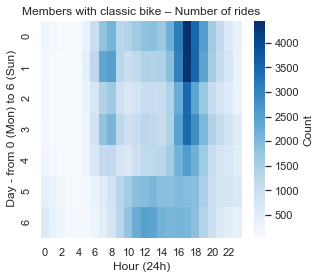

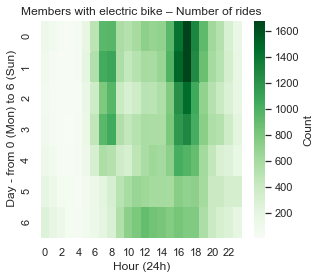

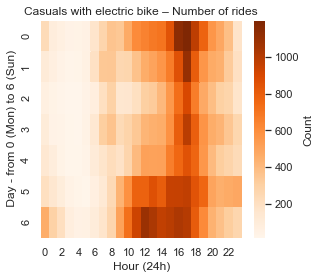

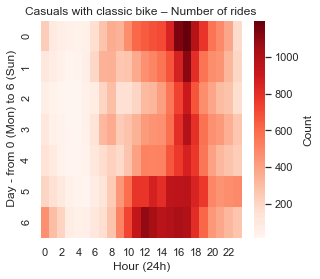

In [197]:
day_hour_member_classic

seaborn.heatmap(day_hour_member_classic, cmap="Blues"#, norm=LogNorm()
           ,cbar_kws={'label': 'Count'}
            )
#ax.set_yticks(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Members with classic bike – Number of rides")
plt.savefig("heatmap_Members_Classic" + date_header + ".png",dpi=300)
plt.show()

seaborn.heatmap(day_hour_member_electric, cmap="Greens"#, norm=LogNorm()
           ,cbar_kws={'label': 'Count'}
            )
#ax.set_yticks(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Members with electric bike – Number of rides")
plt.savefig("heatmap_Members_Electric" + date_header + ".png",dpi=300)
plt.show()

seaborn.heatmap(day_hour_casual_electric, cmap="Oranges"#, norm=LogNorm()
           ,cbar_kws={'label': 'Count'}
            )
#ax.set_yticks(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Casuals with electric bike – Number of rides")
plt.savefig("heatmap_Casuals_Electric" + date_header + ".png",dpi=300)
plt.show()

seaborn.heatmap(day_hour_casual_classic, cmap="Reds"#, norm=LogNorm()
           ,cbar_kws={'label': 'Count'}
            )
#ax.set_yticks(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xlabel("Hour (24h)")
plt.ylabel(" Day - from 0 (Mon) to 6 (Sun)")
plt.title("Casuals with classic bike – Number of rides")
plt.savefig("heatmap_Casuals_Classic" + date_header + ".png",dpi=300)
plt.show()

In [191]:
([data.rideable_type == ("electric_bike" or "docked_bike")])

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 502511    False
 502512    False
 502513    False
 502514    False
 502515     True
 Name: rideable_type, Length: 502516, dtype: bool]

In [189]:
True + False

1

In [198]:
data.keys()

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'day_of_week', 'starting_hour'],
      dtype='object')